<h2> Plot Wyoming Cloud Radar data

In [1]:
# Load the needed packages
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats

import awot
from awot.graph import FlightLevel, RadarVerticalPlot, RadarUtilityPlot

%matplotlib inline

<b>Supply input data and plotting characteristics</b>

In [2]:
file1 = "WCR.TEST14.20140917.183235_185638.down.nc"
#file = "WCR.TEST14.20140618.200302_201559.up.nc"
wcrf1 = os.path.join("/Users/guy/data/king_air/test2014/wcr", file1)

file = "WCR.OWLES13.20140127.203210_210457.up-down.nc"
wcrf2 = os.path.join("/Users/guy/data/king_air/owles2013/wcr/", file)

start_time = "2014-01-27 20:35:00"
end_time = "2014-01-27 20:40:00"

# Set the project name
Project="TEST14"

#TEST2014
#altmin, altmax = 1500., 8000.

#OWLES2013
altmin, altmax = 0., 3000.

refmin, refmax = -50., 30.
#velmin, velmax = -16., 16. # Nyquist
velmin, velmax = -3., 3. # Nyquist

<b>Read in the radar data</b>

In [3]:
wcr = awot.io.read_wcr2(fname=wcrf2)

height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


In [4]:
print(wcr.keys())
print("Reflectivity Min/Max = %f / %f \n"
      "Velocity Min/Max = %f / %f \n"
      "Altitude Min/Max = %f / %f \n"
      "Height Min/Max = %f / %f \n"
      "Surface Min/Max = %f / %f \n"%(
        wcr['fields']['reflectivity']['data'].min(),wcr['fields']['reflectivity']['data'].max(),
        wcr['fields']['velocity']['data'].min(),wcr['fields']['velocity']['data'].max(),
        wcr['altitude']['data'].min(), wcr['altitude']['data'].max(),
        wcr['height']['data'].min(), wcr['height']['data'].max(),
        wcr['surface']['data'].min(), wcr['surface']['data'].max()))
print(wcr['time']['data'].min(), wcr['time']['data'].max())

print(wcr['fields']['reflectivity']['data'][:,0,...].shape)
#wcr['fields']['reflectivity']['data'].shape, data['data'].shape
qArr = mstats.mquantiles(wcr['fields']['reflectivity']['data'], prob=[5, 10, 25, 50, 75, 90, 95], axis=0)
qArr

['fields', 'tas', 'ground_speed', 'aircraft_wind', 'reflectivity_minimum', 'data_format', 'longitude', 'height', 'project', 'platform', 'flight_number', 'height_ldr', 'surface', 'aspect', 'time', 'latitude', 'altitude', 'height_zdr', 'beam_vector', 'metadata']
Reflectivity Min/Max = -54.610954 / 46.513153 
Velocity Min/Max = -15.402483 / 15.429156 
Altitude Min/Max = 1013.030029 / 2786.558594 
Height Min/Max = 66.791504 / 2905.298340 
Surface Min/Max = 0.000000 / 1390856654.823528 

(datetime.datetime(2014, 1, 27, 20, 32, 10, 876783), datetime.datetime(2014, 1, 27, 21, 4, 56, 766817))
(9750,)


masked_array(data =
 [[37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]
 [37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]
 [37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]
 ..., 
 [37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]
 [37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]
 [37.56376266479492 34.78822708129883 43.872779846191406 ...,
  -44.578269958496094 -47.083927154541016 -49.66966247558594]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..

<b>Make a vertical plot of reflectivity and velocity fields</b>

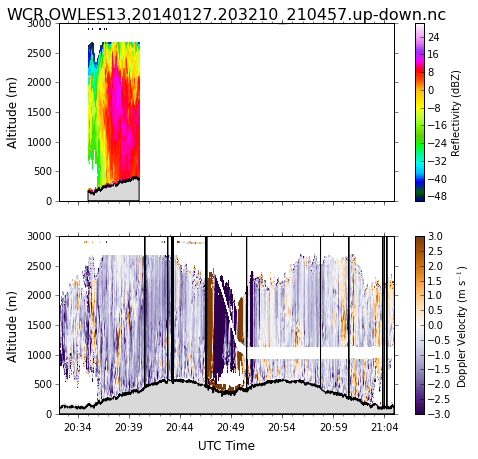

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5,7), sharex=True)

wcr_vp= RadarVerticalPlot(wcr)

wcr_vp.time_height_image('reflectivity', ax=ax1, plot_log10_var=False,
              start_time=start_time, end_time=end_time,
                         vmin=refmin, vmax=refmax,
                         fill_surface=True,
                         cb_label=r'Reflectivity (dBZ)',
                         height_min=altmin, height_max=altmax, title=file,
                         ylab=r'Altitude (m)', ylabFontSize=12)
              
wcr_vp.time_height_image('velocity', ax=ax2, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=velmin, vmax=velmax,
                         fill_surface=True,
                         cmap="PuOr_r",
                         cb_label=r'Doppler Velocity (m s$^{-1}$)',
                         height_min=altmin, height_max=altmax,
                         ylab=r'Altitude (m)', ylabFontSize=12,
                         xlab='UTC Time', xlabFontSize=12)

<b>Instantiate a RadarUtilityPlot instance for frequency calculations.</b>

In [4]:
wcr_util = RadarUtilityPlot(wcr)

<b>Now we can produce a bivariate frequency distribution using AWOT. The first plot uses the RadarUtilityPlot class. This is the recommended method as the second type will be deprecated in the future.</b>

0 (190,)
-27.1171 37.5638
0.0 37.5637626648
1 (190,)
-23.5352 30.6935
0.0 37.5637626648
2 (190,)
-23.8135 33.2639
0.0 37.5637626648
3 (190,)
-26.9705 33.4328
0.0 37.5637626648
4 (190,)
-27.6091 34.7882
0.0 37.5637626648
5 (190,)
-28.7556 27.7637
0.0 37.5637626648
6 (190,)
-25.8996 30.8744
0.0 37.5637626648
7 (190,)
-28.9669 32.5724
0.0 37.5637626648
8 (190,)
-30.0326 33.059
0.0 37.5637626648
9 (190,)
-29.3468 36.1569
0.0 37.5637626648
10 (190,)
-29.3731 37.9727
0.0 37.9727249146
11 (190,)
-30.264 37.9231
0.0 37.9727249146
12 (190,)
-26.7582 38.7478
0.0 38.7477722168
13 (190,)
-29.5065 40.0894
0.0 40.0893859863
14 (190,)
-32.2137 40.2554
0.0 40.2554321289
15 (190,)
-27.6367 39.8239
0.0 40.2554321289
16 (190,)
-28.3846 40.9575
0.0 40.9574890137
17 (190,)
-26.8983 41.2003
0.0 41.2002601624
18 (190,)
-27.3153 40.7159
0.0 41.2002601624
19 (190,)
-20.9572 40.6339
0.0 41.2002601624
20 (190,)
-28.6604 40.1727
0.0 41.2002601624
21 (190,)
-33.1197 36.1799
0.0 41.2002601624
22 (190,)
-30.4971 35.

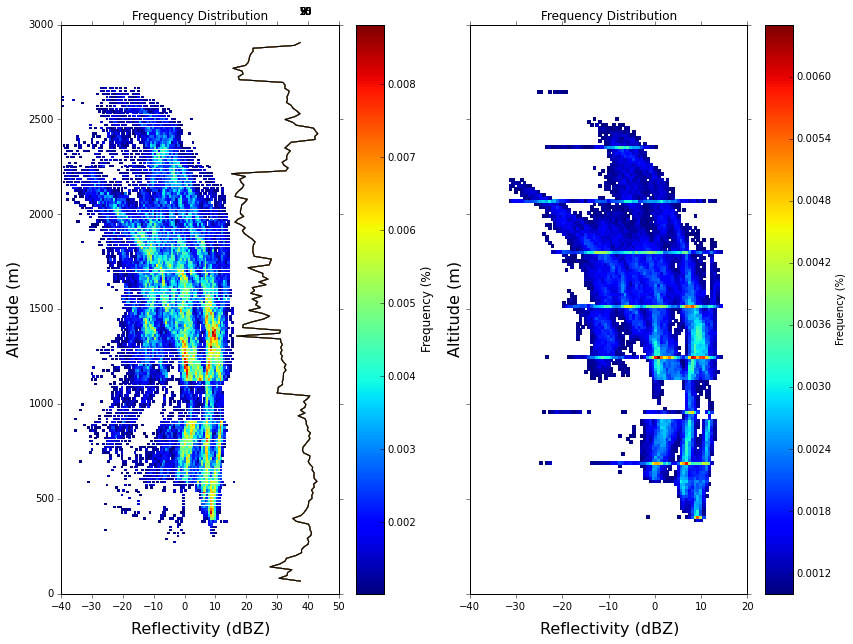

In [6]:
figC, (axC0, axC1) = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

wcr_util.plot_bivariate_frequency('reflectivity', 'height', start_time=start_time, end_time=end_time,
                                  xbinsminmax=(-40., 20.), ybinsminmax=(0., 3000.), nbinsx=100, nbinsy=390,
                                  mask_below=0.00001, plot_colorbar=True, plot_percent=True, 
                                  xlab= "Reflectivity (dBZ)", ylab="Altitude (m)", xpad=10,
                                  title="Frequency Distribution", titleFontSize=12,
                                  cb_fontsize=12,
                                  ax=axC0, fig=figC)

wcr_util.plot_quantiles('reflectivity', quantiles=[5, 10, 25, 50, 75, 90, 95], height_axis=1, 
                        setup_axes=False, ax=axC0)

# Create subsets of arrays
refsub = awot.util.time_subset_awot_dict(wcr['time'], wcr['fields']['reflectivity'],
                                        start_time, end_time)
altsub = awot.util.time_subset_awot_dict(wcr['time'], wcr['altitude'],
                                        start_time, end_time)

Ht2D, alt2D = np.meshgrid(wcr['height']['data'][:], wcr['altitude']['data'][:])
#tas2D, Ht2D = np.meshgrid(tassub['data'][:], wcr['height']['data'][:])
#Ht2D, tas2D = np.meshgrid(wcr['height']['data'][:], tassub['data'][:])
awot.graph.plot_bivariate_frequency(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(),
#awot.graph.plot_bivariate_frequency(refsub['data'].ravel(), Ht2D.ravel(),
                                    xbinsminmax=(-40., 20.), ybinsminmax=(0., 3000.), nbinsx=100, nbinsy=190,
                                    mask_below=0.00001, plot_colorbar=True, plot_percent=True, 
                                    xlab= "Reflectivity (dBZ)", ylab="Altitude (m)", xpad=10,
                                    title="Frequency Distribution", titleFontSize=12, ax=axC1, fig=figC)


figC.tight_layout()

<b>Produce CFADs - caclulating frequency at every height.</b>

/Users/guy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:286: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins
/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.8-py2.7.egg/awot/graph/radar_utility.py:337: RuntimeWarning: invalid value encountered in less
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


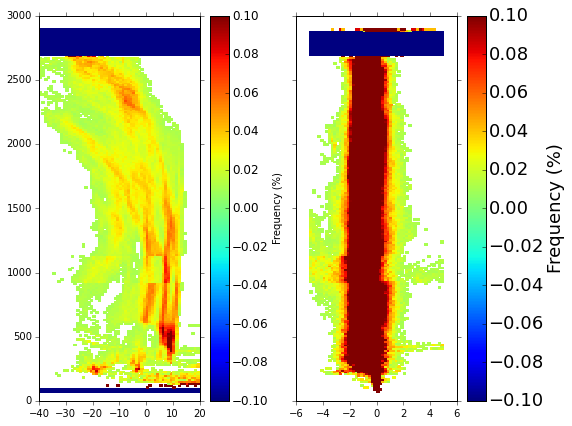

In [5]:
figC, (axZ, axW) = plt.subplots(1, 2, sharey=True, figsize=(8,6))

#awot.graph.plot_cfad(wcr['fields']['reflectivity']['data'][:], wcr['height']['data'][:],
#                    xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
#                    mask_below=.01, ax=axZ)
#awot.graph.plot_cfad(wcr['fields']['velocity']['data'][:], wcr['height']['data'][:],
#                    xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
#                    mask_below=.01, ax=axW)
wcr_util.plot_cfad('reflectivity', height_axis=1,
                    xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, cb_fontsize=10, cb_ticklabel_size=12, ax=axZ)
wcr_util.plot_cfad('velocity'[:], height_axis=1,
                    xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, cb_fontsize=18, cb_ticklabel_size=18, ax=axW)
figC.tight_layout()

Produce CFAD for time subset of flight

/Users/guy/anaconda/lib/python2.7/site-packages/awot-0.2.8-py2.7.egg/awot/graph/common.py:616: RuntimeWarning: invalid value encountered in less


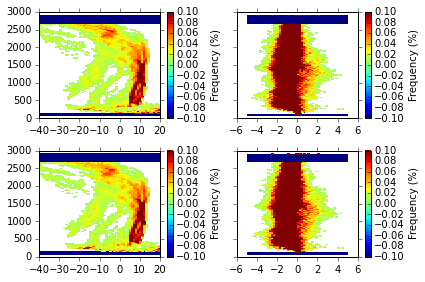

In [9]:
figC, ((axZ1, axW1), (axZ2, axW2)) = plt.subplots(2, 2, sharey=True)

# Create subsets of arrays
velsub = awot.util.time_subset_awot_dict(wcr['time'], wcr['fields']['velocity'],
                                        start_time, end_time)
awot.graph.plot_cfad(refsub['data'][:], wcr['height']['data'][:],
                    xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, ax=axZ1)
awot.graph.plot_cfad(velsub['data'][:], wcr['height']['data'][:],
                    xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
#                    plot_contour_levels=[.01, .1, .5, 1.],
                    mask_below=.01, ax=axW1)
wcr_util.plot_cfad('reflectivity', height_axis=1, start_time=start_time, end_time=end_time,
                    xbinsminmax=(-40., 20.), nbinsx=61, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, ax=axZ2)
wcr_util.plot_cfad('velocity'[:], height_axis=1, start_time=start_time, end_time=end_time,
                    xbinsminmax=(-5., 5.), nbinsx=51, plot_percent=True, plot_colorbar=True,
                    mask_below=.01, ax=axW2)
figC.tight_layout()

Manual bivariate code

In [10]:
binx, biny = np.linspace(-50, 50, 100, endpoint=True), np.linspace(0, 3000, 120, endpoint=True)
CFAD, xedges, yedges = np.histogram2d(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(),
                                      bins=(binx, biny),normed=True)
CFAD = axC.hist2d(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(), normed=True,
                 )#range=[[-40., 25.], [0., 3000.]], bins=[15, 10]
X, Y = np.meshgrid(xedges, yedges)
CFAD = np.ma.masked_where(CFAD < 0.00001, CFAD)
plt.pcolormesh(X, Y, CFAD.T * 100)
axC.set_aspect('equal')
plt.colorbar()

Manual CFAD code

In [9]:
def create_cfad(radar, fieldname, bins):
    '''Create a CFAD.'''
    # Create CFAD array to fill
    pdf = np.empty((len(radar['height']['data']),len(bins)-1))
    CFAD = np.zeros_like(pdf)
    percentiles
    data = wcr['fields'][fieldname]['data'][:]
    for nn in range(len(CFAD)):
#        pdf[nn, :], bin_edges = np.histogram(data[nn,:], bins=bins, density=False)
#        CFAD[nn, :] = pdf[nn, :]/ np.sum(pdf[nn, :])
        CFAD[nn,:], bin_edges = np.histogram(data[nn,:], bins=bins, density=True)
        
    return CFAD

In [8]:
binsZ = np.linspace(-40, 20, 61, endpoint=True)
binsW = np.linspace(-5, 5, 51, endpoint=True)
CFADZ = create_cfad(wcr, 'reflectivity', binsZ)
CFADW = create_cfad(wcr, 'velocity', binsW)

CFADZ = np.ma.masked_equal(CFADZ, 0.)
CFADW = np.ma.masked_equal(CFADW, 0.)

XZ, YZ = np.meshgrid(binsZ, wcr['height']['data'])
XW, YW = np.meshgrid(binsW, wcr['height']['data'])
p1 = axZ.pcolormesh(XZ, YZ, CFADZ)
axZ.set_xlim(-40, 20)
axZ.set_xlabel('Ze (dBZ)')
axZ.set_ylabel('Altitude (m)')
fig.colorbar(p1, ax=axZ)

p2 = axW.pcolormesh(XW, YW, CFADW)
axW.set_xlim(-5, 5)
axW.set_xlabel('W (m/s)')
fig.colorbar(p2, ax=axW)